# PINN Example 

Burgers example $u=...$

at $t=0$ , sine function (boundary_t0)

at sides $t \in [0,1], u=0$ (open_boundary)

## Preliminaries

In [1]:
from phi.tf.flow import *

#rnd = TF_BACKEND  # sample different points in the domain each iteration
rnd = math.choose_backend(1)  # use same random points for all iterations

Could not load resample cuda libraries: CUDA binaries not found at /Users/thuerey/Dropbox/mbaDevelSelected/phiflow-v1.5/phi/tf/cuda/build/resample.so. Run "python setup.py cuda" to compile them





/Users/thuerey/Dropbox/mbaDevelSelected/phiflow-v1.5/phi/tf/flow.py:15: UserWarning: TensorFlow-CUDA solver is not available. To compile it, download phiflow sources and run
$ python setup.py tf_cuda
before reinstalling phiflow.
  warnings.warn("TensorFlow-CUDA solver is not available. To compile it, download phiflow sources and run\n$ python setup.py tf_cuda\nbefore reinstalling phiflow.")


In [2]:
def network(x, t):
    """ Dense neural network with 8 hidden layers and 3021 parameters in total.
        Parameters will only be allocated once (auto reuse).
    """
    y = math.stack([x, t], axis=-1)
    for i in range(8):
        y = tf.layers.dense(y, 20, activation=tf.math.tanh, name='layer%d' % i, reuse=tf.AUTO_REUSE)
    return tf.layers.dense(y, 1, activation=None, name='layer_out', reuse=tf.AUTO_REUSE)

def f(u, x, t):
    """ Physics-based loss function with Burgers equation """
    u_t = gradients(u, t)
    u_x = gradients(u, x)
    u_xx = gradients(u_x, x)
    return u_t + u*u_x - (0.01 / np.pi) * u_xx

def boundary_tx(N):
    x = np.linspace(-1,1,128)
    # precomputed solution from forward simulation:
    u = np.asarray( [0.008612174447657694, 0.02584669669548606, 0.043136357266407785, 0.060491074685516746, 0.07793926183951633, 0.0954779141740818, 0.11311894389663882, 0.1308497114054023, 0.14867023658641343, 0.1665634396808965, 0.18452263429574314, 0.20253084411376132, 0.22057828799835133, 0.23865132431365316, 0.25673879161339097, 0.27483167307082423, 0.2929182325574904, 0.3109944766354339, 0.3290477753208284, 0.34707880794585116, 0.36507311960102307, 0.38303584302507954, 0.40094962955534186, 0.4188235294008765, 0.4366357052408043, 0.45439856841363885, 0.4720845505219581, 0.4897081943759776, 0.5072391070000235, 0.5247011051514834, 0.542067187709797, 0.5593576751669057, 0.5765465453632126, 0.5936507311857876, 0.6106452944663003, 0.6275435911624945, 0.6443221318186165, 0.6609900633731869, 0.67752574922899, 0.6939334022562877, 0.7101938106059631, 0.7263049537163667, 0.7422506131457406, 0.7580207366534812, 0.7736033721649875, 0.7889776974379873, 0.8041371279965555, 0.8190465276590387, 0.8337064887158392, 0.8480617965162781, 0.8621229412131242, 0.8758057344502199, 0.8891341984763013, 0.9019806505391214, 0.9143881632159129, 0.9261597966464793, 0.9373647624856912, 0.9476871303793314, 0.9572273019669029, 0.9654367940878237, 0.9724097482283165, 0.9767381835635638, 0.9669484658390122, 0.659083299684951, -0.659083180712816, -0.9669485121167052, -0.9767382069792288, -0.9724097635533602, -0.9654367970450167, -0.9572273263645859, -0.9476871280825523, -0.9373647681120841, -0.9261598056102645, -0.9143881718456056, -0.9019807055316369, -0.8891341634240081, -0.8758057205293912, -0.8621229450911845, -0.8480618138204272, -0.833706571569058, -0.8190466131476127, -0.8041372124868691, -0.7889777195422356, -0.7736033858767385, -0.758020740007683, -0.7422507481169578, -0.7263049162371344, -0.7101938950789042, -0.6939334061553678, -0.677525822052029, -0.6609901538934517, -0.6443222327338847, -0.6275436932970322, -0.6106454472814152, -0.5936507836778451, -0.5765466491708988, -0.5593578078967361, -0.5420672759411125, -0.5247011730988912, -0.5072391580614087, -0.4897082914472909, -0.47208460952428394, -0.4543985995006753, -0.4366355580500639, -0.41882350871539187, -0.40094955631843376, -0.38303594105786365, -0.36507302109186685, -0.3470786936847069, -0.3290476440540586, -0.31099441589505206, -0.2929180880304103, -0.27483158663081614, -0.2567388003912687, -0.2386513127155433, -0.22057831776499126, -0.20253089403524566, -0.18452269630486776, -0.1665634500729787, -0.14867027528284874, -0.13084990929476334, -0.1131191325854089, -0.09547794429803691, -0.07793928430794522, -0.06049114408297565, -0.0431364527809777, -0.025846763281087953, -0.00861212501518312] );
    t = np.asarray(rnd.ones_like(x)) * 0.5
    perm = np.random.permutation(128) 
    return (x[perm])[0:N], (t[perm])[0:N], (u[perm])[0:N]

def _ALT_t0(N): # alternative, impose original initial state at t=0
    x = rnd.random_uniform([N], -1, 1)
    t = rnd.zeros_like(x)
    u = - math.sin(np.pi * x)
    return x, t, u

def open_boundary(N):
    t = rnd.random_uniform([N], 0, 1)
    x = math.concat([math.zeros([N//2]) + 1, math.zeros([N//2]) - 1], axis=0)
    u = math.zeros([N])
    return x, t, u

# out = boundary_tx(20)
# print(len(out[0]))
# print(out[0][0:10])
# print(out[2][0:10])
# a=np.asarray([1,2,3])
# perm=np.random.permutation(3)
# c=(a[b])[0:2]
# print(c)

Setup sampling points in inner domain

In [3]:
# generate array with positions: 
#   -1 to 1 spatial with 128 cells
#   0 to 1 in time with 1+32 timesteps
grids_xt = np.meshgrid(np.linspace(-1, 1, 128), np.linspace(0, 1, 33), indexing='ij')
grid_x, grid_t = [tf.convert_to_tensor(t, tf.float32) for t in grids_xt]

# # gx ,gt = 
# #[tf.convert_to_tensor(t, tf.float32) 
# # for t in np.meshgrid( np.linspace(-1, 1, 128), np.linspace(0, 1, 33), indexing='ij')]

# for t in np.meshgrid( np.linspace(-1, 1, 128), np.linspace(0, 1, 33), indexing='ij'):
#     print(format(t.shape))
#     print(format(t))

# #tx = np.meshgrid( np.linspace(-1, 1, 128), indexing='ij')
# print(format(grid_x))
# print(format(grid_x.shape))

# create 4D tensor with batch and channel dimensions in addition to space and time
# in this case gives shape=(1, 128, 33, 1)
grid_u = math.expand_dims(network(grid_x, grid_t))

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


Helper to show

Size of grid_u: (1, 128, 33, 1)




Randomly initialized network state:


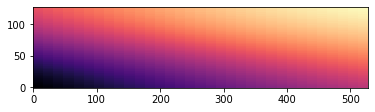

In [4]:
# test image output
import matplotlib.pyplot as plt
print("Size of grid_u: "+format(grid_u.shape))

session = Session(None)
session.initialize_variables()

def show_state(a, run_session=True):
    global session
    if run_session: a = session.run(a) # special for showing NN results, run through TF 

    # we only have 33 time steps, blow up by a factor of 2^4 to make it easier to see
    # (could also be done with more evaluations of network)
    for i in range(4):
        a = np.concatenate( [a,a] , axis=3)
    a = np.reshape( a, [a.shape[1],a.shape[2]*a.shape[3]] )
    #print(a.shape)
    plt.imshow(a, origin='lower', cmap='magma')
    
print("Randomly initialized network state:")
show_state(grid_u)

## The loss functions & training

set up losses...

Note: very slow, needs _lots_ of iterations, only 10k for testing by default (`iters`), increase to get better results.

In [5]:
# Boundary loss
num_sample_points_bnd = 100
x_bc, t_bc, u_bc = [math.concat([v_t0, v_x], axis=0) for v_t0, v_x in zip(boundary_tx(num_sample_points_bnd), open_boundary(num_sample_points_bnd))]
x_bc, t_bc, u_bc = np.asarray(x_bc,dtype=np.float32), np.asarray(t_bc,dtype=np.float32) ,np.asarray(u_bc,dtype=np.float32)
#with app.model_scope():
loss_u = math.l2_loss(network(x_bc, t_bc)[:, 0] - u_bc)  # normalizes by first dimension, N_bc

# Physics loss inside of domain
num_sample_points_inner = 1000
x_ph, t_ph = tf.convert_to_tensor(rnd.random_uniform([num_sample_points_inner], -1, 1)), tf.convert_to_tensor(rnd.random_uniform([num_sample_points_inner], 0, 1))
loss_ph = math.l2_loss(f(network(x_ph, t_ph)[:, 0], x_ph, t_ph))  # normalizes by first dimension, N_ph

# Combine
ph_factor = 1.
loss = loss_u + ph_factor * loss_ph # allows us to control the relative influence of loss_ph 

optim = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(loss)
#optim = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss) # not much benefit here


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
session.initialize_variables()

import time
start = time.time()

iters = 10000
for optim_step in range(iters+1):
  _, loss_value = session.run([optim, loss])
  if optim_step%500==0: 
        print('Step %d, loss: %f' % (optim_step,loss_value))
        #show_state(grid_u)
        
end = time.time()
print("Runtime {:.2f}s".format(end-start))

Step 0, loss: 0.111230
Step 50, loss: 0.059567
Step 100, loss: 0.050345
Step 150, loss: 0.040759
Step 200, loss: 0.033108
Step 250, loss: 0.027403
Step 300, loss: 0.021609
Step 350, loss: 0.017801
Step 400, loss: 0.013434
Step 450, loss: 0.031098
Step 500, loss: 0.019279
Step 550, loss: 0.015963
Step 600, loss: 0.014481
Step 650, loss: 0.013526
Step 700, loss: 0.012771
Step 750, loss: 0.012119
Step 800, loss: 0.011504
Step 850, loss: 0.010888
Step 900, loss: 0.010266
Step 950, loss: 0.009654
Step 1000, loss: 0.009068
Step 1050, loss: 0.008521
Step 1100, loss: 0.008014
Step 1150, loss: 0.007544
Step 1200, loss: 0.007104
Step 1250, loss: 0.006684
Step 1300, loss: 0.006282
Step 1350, loss: 0.005901
Step 1400, loss: 0.005545
Step 1450, loss: 0.005212
Step 1500, loss: 0.004900
Step 1550, loss: 0.004604
Step 1600, loss: 0.004324
Step 1650, loss: 0.004058
Step 1700, loss: 0.003808
Step 1750, loss: 0.003562
Step 1800, loss: 0.003326
Step 1850, loss: 0.003089
Step 1900, loss: 0.002863
Step 1950

Looks pretty good on first sight!

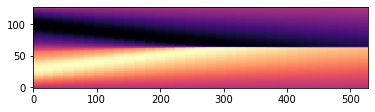

In [7]:
# a = session.run(grid_u)
# a = a[0,:,:,0].transpose() # ; print(a.shape)
# pylab.imshow(a, origin='lower', cmap='magma')
show_state(grid_u)

---

## Evaluation

Let's compare solution at $t=0$
Actually not that great, blue curve from PINN quite far away from constraits (in gray)... Solution get's better with larger number of iterations, but requires a surprisingly large number of them for a fairly simple case. The shock in the middle is not well recovered (the maximum is still much too low).


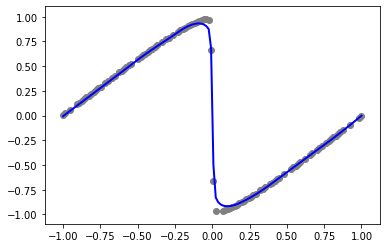

In [8]:
u = session.run(grid_u)
#[u,gx,gt] = session.run([grid_u,grid_x,grid_t]) # print(gt[0:5,17]) # check time...
# solution is imposed at t=1/2 , which is 16 in the array
bc_tx = 16 
uT = u[0,:,bc_tx,0]

fig = plt.figure().gca()
fig.plot(np.linspace(-1,1,len(uT)), uT, lw=2, color='blue')
fig.scatter(x_bc[0:100], u_bc[0:100], color='gray')


Let's check how well the initial state was reconstructed, compared ot the (known) ground truth solution.

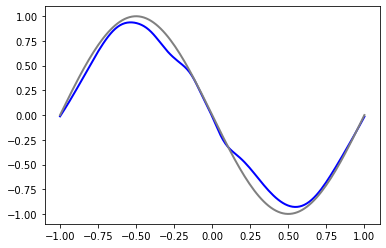

In [9]:
n = 128

# ground truth solution at t0
t0gt = np.asarray( [ [-math.sin(np.pi * x) * 1.] for x in np.linspace(-1,1,n)] )

velP0 = u[0,:,0,0]

fig = plt.figure().gca()
fig.plot(np.linspace(-1,1,len(velP0)), velP0, lw=2, color='blue')
fig.plot(np.linspace(-1,1,len(t0gt)), t0gt, lw=2, color='gray') # optionally show GT, compare to blue


That's not very close...

But we have the forward simulator, so we can use the $t=0$ solution of the network to 
evaluate how well the temporal evoluation was reconstructed by the PINN.

(1, 128, 1)


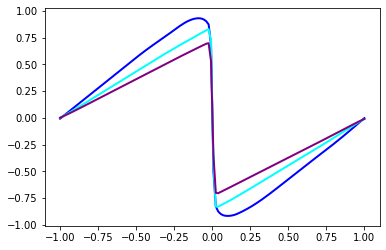

In [10]:
# re-run with phiflow from solution at t=0
dt = 1./32.
steps = 32-bc_tx # depends on where BCs were imposed
initial = u[...,bc_tx:(bc_tx+1),0] # np.reshape(u0, [1,len(u0),1]) 
print(initial.shape)

domain = Domain([n], boundaries=PERIODIC, box=box[-1:1])
state = [BurgersVelocity(domain, velocity=initial, viscosity=0.01/np.pi)]
physics = Burgers()

for i in range(steps):
    state.append( physics.step(state[-1],dt=dt) )

# we only need "velocity.data" from each phiflow state
vels = [x.velocity.data for x in state]

fig = plt.figure().gca()
pltx = np.linspace(-1,1,len(vels[0].flatten()))
fig.plot(pltx, vels[ 0].flatten(), lw=2, color='blue')
#fig.plot(pltx, vels[steps//4].flatten(), lw=2, color='green')
fig.plot(pltx, vels[steps//2].flatten(), lw=2, color='cyan')
fig.plot(pltx, vels[steps-1].flatten(), lw=2, color='purple')
#fig.plot(pltx, t0gt, lw=2, color='gray') # optionally show GT, compare to blue


Versus the PINN output:


(128,)


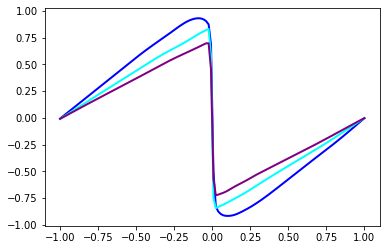

In [11]:
velP = [u[0,:,x,0] for x in range(33)]
print(velP[0].shape)

fig = plt.figure().gca()
fig.plot(pltx, velP[bc_tx+ 0].flatten(), lw=2, color='blue')
#fig.plot(pltx, velP[bc_tx+steps//4].flatten(), lw=2, color='green')
fig.plot(pltx, velP[bc_tx+steps//2].flatten(), lw=2, color='cyan')
fig.plot(pltx, velP[bc_tx+steps-1].flatten(), lw=2, color='purple')


And the error in the PINN reconstruction. Not surprisingly grows over time. 

The shock is not "undone" well towards $t=0$.

(Old: BC at 0, the last state at $t=1$ in purple doesnt capture the sharp shock very well.)

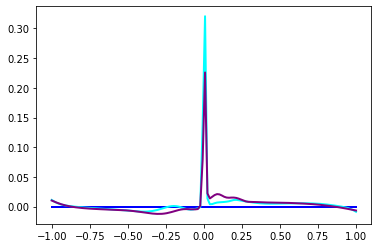

In [12]:
fig = plt.figure().gca()
fig.plot(pltx, (vels[0       ].flatten()-velP[bc_tx         ].flatten()), lw=2, color='blue')
#fig.plot(pltx, (vels[steps//4].flatten()-velP[bc_tx+steps//4].flatten()), lw=2, color='green')
fig.plot(pltx, (vels[steps//2].flatten()-velP[bc_tx+steps//2].flatten()), lw=2, color='cyan')
fig.plot(pltx, (vels[steps-1 ].flatten()-velP[bc_tx+steps-1 ].flatten()), lw=2, color='purple')

All steps over time, with a color map... (note x axis does not show actual simulation time)

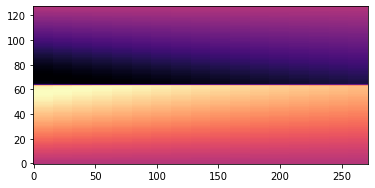

In [13]:
# show solution again as full image over time
sn = np.concatenate(vels, axis=-1)
sn = np.reshape(sn, list(sn.shape)+[1] ) # print(sn.shape)

show_state(sn, run_session=False)